# Perceptron Implementation and Explanation



This notebook presents a detailed implementation of the perceptron, a fundamental model in machine learning. We will explore its functioning step by step, explaining the underlying mathematical equations and their implementation in code.

First, we need to install the required dependencies.

In [1]:
try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    # Installer toutes les librairies nécessaires
    !pip install numpy
else:
    print("""Create an virtual environment for this module and install the required dependencies.
For example:
    conda create --name ML5 python=3.11
    conda activate ML5
    conda install jupyter numpy""")


Create an virtual environment for this module and install the required dependencies.
For example:
    conda create --name ML5 python=3.11
    conda activate ML5
    conda install jupyter numpy


## 1. Introduction to the Perceptron



The perceptron is the basic unit of neural networks. It is a mathematical model inspired by the functioning of biological neurons. A perceptron takes multiple inputs, applies weights to them, adds a bias, then passes the result through an activation function to produce an output.




### Structure of a perceptron



A perceptron is composed of:

- Inputs $X = [x_1, x_2, ..., x_n]$

- Weights $W = [w_1, w_2, ..., w_n]$

- A bias $b$

- An activation function $\sigma$



The perceptron output is calculated as follows:

$$O = \sigma(X \cdot W + b)$$



where $X \cdot W$ represents the dot product between the input and weight vectors.

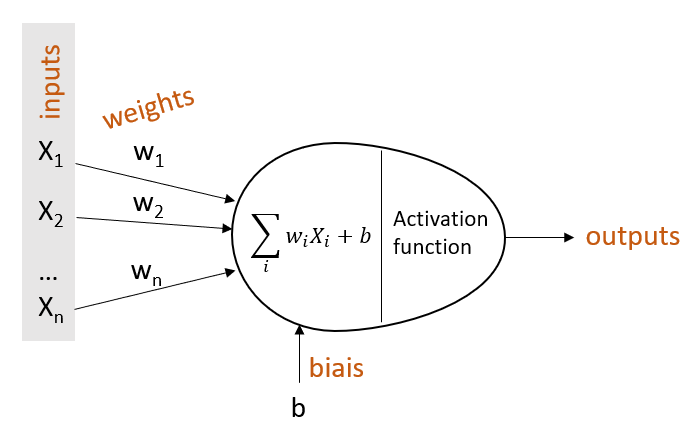

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

## 2. Data Preparation


We’re going to train the neural network to solve the problem below. The first four examples are called a training set. Can you work out the pattern? Should the answer be 0 or 1? Give an explanation of your answer

| Inputs| Outputs  |
|------|------|
|   0 0 1  | 0|
|   1 1 1  | 1|
|   1 0 1  | 1|
|   0 1 1  | 0|
|   1 0 0  | ?|

In [3]:
# Your answer here

#x1 >= 1

Let's start by initializing a simple dataset for our perceptron. We will use a binary classification with the example above

In [4]:
# Dataset initialization
# Each row represents an example with 3 features
inputs = np.array([[0, 0, 1], 
                   [1, 1, 1], 
                   [1, 0, 1], 
                   [0, 1, 1]])

# Target values (0 or 1 for each example)
outputs_target = np.array([[0, 1, 1, 0]]).T

# Display the data
print("Input data (inputs):")
print(inputs)
print("\nTarget values (outputs_target):")
print(outputs_target)

Input data (inputs):
[[0 0 1]
 [1 1 1]
 [1 0 1]
 [0 1 1]]

Target values (outputs_target):
[[0]
 [1]
 [1]
 [0]]


## 3. Activation Functions and Their Derivatives



Activation functions introduce non-linearity into the model, allowing the perceptron to learn complex relationships. We will implement two commonly used activation functions: the sigmoid function and the ReLU (Rectified Linear Unit) function.



### Sigmoid function



The sigmoid function is defined by:

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$



Its derivative is:

$$\sigma'(x) = \sigma(x) \cdot (1 - \sigma(x))$$



### ReLU function



The ReLU function is defined by:

$$\text{ReLU}(x) = \max(0, x)$$



Its derivative is:

$$\text{ReLU}'(x) = \begin{cases}
1 & \text{if } x > 0 \\
0 & \text{if } x \leq 0
\end{cases}$$

In [5]:
# Sigmoid function
def sigmoid(x):
    """Computes the sigmoid function for each element of x"""
    # Your code here
    return((1/(1+np.exp(-x))))

# Derivative of the sigmoid function
def derivated_sigmoid(x):
    """Computes the derivative of the sigmoid function for each element of x"""
    # Your code here
    # return(np.dot(sigmoid(x),(1-sigmoid(x))))
    return(sigmoid(x)*(1-sigmoid(x)))
# ReLU function
def relu(x):
    """Computes the ReLU function for each element of x"""
    # Your code here
    return(np.maximum(0.0,x))
# Derivative of the ReLU function
def derivated_relu(x):
    """Computes the derivative of the ReLU function for each element of x"""
    # Your code here
    return(np.where(x>0,1,0))


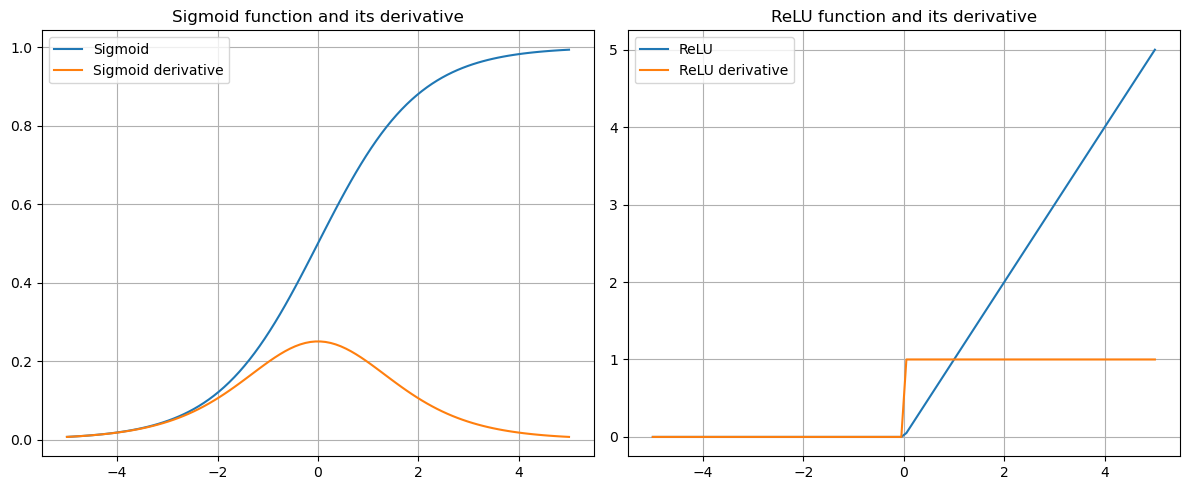

In [6]:


# Visualization of activation functions
x = np.linspace(-5, 5, 100)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x, sigmoid(x), label='Sigmoid')
plt.plot(x, derivated_sigmoid(x), label='Sigmoid derivative')
plt.grid(True)
plt.legend()
plt.title('Sigmoid function and its derivative')

plt.subplot(1, 2, 2)
plt.plot(x, relu(x), label='ReLU')
plt.plot(x, derivated_relu(x), label='ReLU derivative')
plt.grid(True)
plt.legend()
plt.title('ReLU function and its derivative')

plt.tight_layout()
plt.show()

## 4. Weight Initialization and Forward Propagation (feedforward)



### Weight initialization



Before starting training, we need to initialize the perceptron weights. A common practice is to initialize weights with random values close to zero.

In [7]:
def initialize_weights(n):
    """Initializes n random weights between 0 and 1"""
    # Your code here
    # random value from 0.0 to 0.20
    return(np.reshape(np.random.rand(n)/5,shape=(n,1)))

In [8]:
weights = initialize_weights(3)
weights.shape

(3, 1)

### Forward propagation (feedforward)



Forward propagation is the process by which inputs are transformed into outputs through the perceptron. It consists of:

1. Computing the weighted sum of inputs: $z = X \cdot W + b$

2. Applying the activation function: $O = \sigma(z)$

In [9]:
def feedforward(inputs, weights, bias=1):
    """Computes the perceptron output for given inputs"""
    # Your code here
    z = np.dot(inputs,weights)+bias
    r = sigmoid(z)
    return(np.reshape(r,shape=(len(inputs),1)))

In [10]:
outputs = feedforward(inputs,initialize_weights(3))
outputs.shape

(4, 1)

## 5. Error Calculation



To evaluate the model's performance, we need to calculate the error between predicted outputs and target values. We will use the Mean Squared Error (MSE) as our loss function.



The Mean Squared Error is defined by:

$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$



where $y_i$ is the target value and $\hat{y}_i$ is the predicted value for example $i$.



For backpropagation, we need the derivative of the loss function with respect to the model outputs. For MSE, this derivative is:

$$\frac{\partial \text{MSE}}{\partial \hat{y}_i} = \frac{2}{n} (\hat{y}_i - y_i)$$



To simplify, we will directly use the difference between predicted outputs and target values as error:

$$\text{error} = \hat{y} - y$$

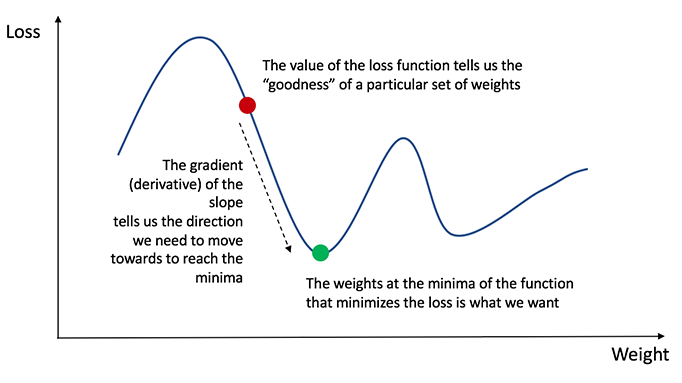

In [ ]:
from sklearn.metrics import mean_squared_error

def mse(outputs, outputs_target):
    """Computes the mean squared error"""
    # Your code here
    return(mean_squared_error(outputs_target, outputs))

def loss(outputs, outputs_target):
    """Computes the error between predicted outputs and target values"""
    # Your code here
    return(outputs-outputs_target)

## 6. Backpropagation



Backpropagation is the algorithm used to adjust the perceptron weights based on the error. The goal is to minimize the error by updating the weights in the opposite direction of the error gradient with respect to the weights.



### Backpropagation equations



To update the weights, we use the following update rule:

$$W_{j+1} = W_j - \frac{\partial \text{Loss}}{\partial W_j}$$



where $\frac{\partial \text{Loss}}{\partial W_j}$ is the gradient of the loss function with respect to the weights.



Using the chain rule, we can decompose this gradient as follows:

$$\frac{\partial \text{Loss}}{\partial W_j} = \frac{\partial \text{Loss}}{\partial O} \cdot \frac{\partial O}{\partial z} \cdot \frac{\partial z}{\partial W_j}$$



where:

- $\frac{\partial \text{Loss}}{\partial O}$ is the derivative of the loss function with respect to the model outputs. For our simplified loss function, this is simply $O - y_{\text{true}}$.

- $\frac{\partial O}{\partial z}$ is the derivative of the activation function with respect to its input. For the sigmoid function, this is $\sigma(z) \cdot (1 - \sigma(z))$.

- $\frac{\partial z}{\partial W_j}$ is the derivative of the weighted sum with respect to the weights. This is simply $X$.



Combining these terms, we get:

$$\frac{\partial \text{Loss}}{\partial W_j} = (O - y_{\text{true}}) \cdot \sigma(z) \cdot (1 - \sigma(z)) \cdot X$$



And the weight update rule becomes:

$$W_{j+1} = W_j - (O - y_{\text{true}}) \cdot \sigma(z) \cdot (1 - \sigma(z)) \cdot X$$

$$W_{j+1} = W_j -  X \cdot ((O - y_{\text{true}}) * \sigma(z) * (1 - \sigma(z)))^{T} $$

In [12]:
def backpropagation(weights, inputs, outputs, gap):
    """Computes new weights after backpropagation"""
    # print(f"weights:{weights.shape}")
    # print(f"inputs:{inputs.shape}")
    # print(f"outputs:{outputs.shape}")
    # print(f"gap:{gap.shape}")
    # print(f"z:{z.shape}")
    # print(f"ds:{ds.shape}")
    new_weights = weights - np.dot(inputs.T,gap*derivated_sigmoid(outputs))
    # print(new_weights)
    return(new_weights)


In [13]:
gap = (outputs_target-outputs)
backpropagation(initialize_weights(3), inputs, outputs, gap).shape

(3, 1)

## 7. Model Training



Now that we have defined all necessary functions, we can train our perceptron. Training consists of repeating the following steps for a certain number of iterations:

1. Forward propagation to compute outputs

2. Error calculation

3. Backpropagation to update weights

In [14]:
inputs,inputs.shape,outputs_target,outputs_target.shape

(array([[0, 0, 1],
        [1, 1, 1],
        [1, 0, 1],
        [0, 1, 1]]),
 (4, 3),
 array([[0],
        [1],
        [1],
        [0]]),
 (4, 1))

In [15]:
# Training parameters
nb_iter = 1000  # Number of iterations
n = len(inputs[0])
# Weight initialization
#your code here
weights = initialize_weights(n)
print("Initial weights:\n", weights)
# Error history for visualization
error_history = []

# Training loop
for i in range(nb_iter):
    #Your code here
    outputs = feedforward(inputs, weights, bias=1)
    gap = outputs -outputs_target
    weights = backpropagation(weights, inputs, outputs, gap)
    # Display error every 100 iterations
    error = loss(outputs,outputs_target)
    error_history.append(error)
    if (i + 1) % 100 == 0:
        print(f"Iteration {i + 1}, MSE Error: {error:.6f}")

print("\nFinal weights:\n", weights)

Initial weights:
 [[0.13433548]
 [0.10397748]
 [0.0815066 ]]
Iteration 100, MSE Error: 0.003592
Iteration 200, MSE Error: 0.000881
Iteration 300, MSE Error: 0.000385
Iteration 400, MSE Error: 0.000214
Iteration 500, MSE Error: 0.000136
Iteration 600, MSE Error: 0.000094
Iteration 700, MSE Error: 0.000069
Iteration 800, MSE Error: 0.000052
Iteration 900, MSE Error: 0.000041
Iteration 1000, MSE Error: 0.000033

Final weights:
 [[10.40043256]
 [-0.41872953]
 [-5.90516342]]


## 8. Results Visualization and Interpretation



Let's visualize the error evolution during training and compare the final model outputs with the target values.

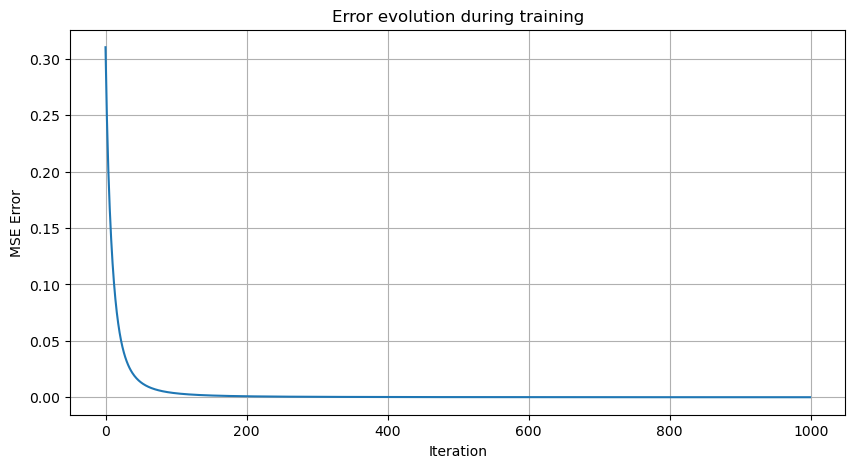

In [16]:
# Visualization of error evolution
plt.figure(figsize=(10, 5))
plt.plot(error_history)
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('MSE Error')
plt.title('Error evolution during training')
plt.show()

In [17]:
# Compute final outputs
final_outputs = feedforward(inputs, weights)

# Compare final outputs with target values
print("Results comparison:")
print("\nInputs | Predicted output | Target value")
print("-" * 45)
for i in range(len(inputs)):
    print(f"{inputs[i]} | {final_outputs[i][0]:.6f} | {outputs_target[i][0]}")

# Binary classification (threshold at 0.5)
predicted_classes = (final_outputs > 0.5).astype(int)
print("\nBinary classification (threshold at 0.5):")
print("\nInputs | Predicted class | True class")
print("-" * 45)
for i in range(len(inputs)):
    print(f"{inputs[i]} | {predicted_classes[i][0]} | {outputs_target[i][0]}")

# Compute accuracy
accuracy = np.mean(predicted_classes == outputs_target) * 100
print(f"\nModel accuracy: {accuracy:.2f}%")

Results comparison:

Inputs | Predicted output | Target value
---------------------------------------------
[0 0 1] | 0.007354 | 0
[1 1 1] | 0.993797 | 1
[1 0 1] | 0.995911 | 1
[0 1 1] | 0.004850 | 0

Binary classification (threshold at 0.5):

Inputs | Predicted class | True class
---------------------------------------------
[0 0 1] | 0 | 0
[1 1 1] | 1 | 1
[1 0 1] | 1 | 1
[0 1 1] | 0 | 0

Model accuracy: 100.00%


## 9. Conclusion



In this notebook, we implemented a simple perceptron and explained in detail the underlying mathematical equations. We saw how to:



1. Initialize perceptron weights

2. Perform forward propagation to compute outputs

3. Calculate error between predicted outputs and target values

4. Use backpropagation to adjust weights

5. Train the model over multiple iterations

6. Evaluate model performance



The perceptron is a simple but powerful model that forms the basis of more complex neural networks. Understanding its functioning is essential for grasping more advanced concepts in deep learning.

## 10. Appendix: Equation Summary



### Forward propagation

$$z = X \cdot W + b$$

$$O = \sigma(z)$$



### Sigmoid function and its derivative

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

$$\sigma'(x) = \sigma(x) \cdot (1 - \sigma(x))$$



### ReLU function and its derivative

$$\text{ReLU}(x) = \max(0, x)$$

$$\text{ReLU}'(x) = \begin{cases}
1 & \text{if } x > 0 \\
0 & \text{if } x \leq 0
\end{cases}$$



### Mean Squared Error (MSE)

$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$



### Backpropagation

$$\frac{\partial \text{Loss}}{\partial W_j} = \frac{\partial \text{Loss}}{\partial O} \cdot \frac{\partial O}{\partial z} \cdot \frac{\partial z}{\partial W_j}$$



$$\frac{\partial \text{Loss}}{\partial O} = O - y_{\text{true}}$$



$$\frac{\partial O}{\partial z} = \sigma'(z)$$



$$\frac{\partial z}{\partial W_j} = X$$



$$W_{j+1} = W_j - (O - y_{\text{true}}) \cdot \sigma'(z) \cdot X$$